In [1]:
from pathlib import Path

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns

import searchnets

In [2]:
def cm_to_inches(cm):
    return cm / 2.54

In [3]:
mpl.style.use(['seaborn-darkgrid', 'seaborn-paper'])

paths

In [4]:
SOURCE_DATA_CSV_PATH = pyprojroot.here('results/VSD/source_data/VSD-searchstims-acc-v-set-size.csv')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-2/searchstims-VSD')

/home/bart/.cache/pypoetry/virtualenvs/nicholson-prinz-2021-zheWulbu-py3.7/lib/python3.7/site-packages/pyprojroot/pyprojroot.py:51: UserWarning: Path doesn't exist: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/docs/paper/figures/experiment-2/searchstims-VSD
  warnings.warn("Path doesn't exist: {}".format(path))


constants

In [5]:
LEARNING_RATE = 1e-3

METHODS = [
    'transfer'
]

MODES = [
    'classify',
]

## load source data

Get just the transfer learning results, then group by network, stimulus, and set size, and compute the mean accuracy for each set size.

In [6]:
df_all = pd.read_csv(SOURCE_DATA_CSV_PATH)
df_all['accuracy'] = df_all['accuracy'] * 100  # convert to percentage for plot

NET_NAMES_FOR_DISPLAY = {
    'alexnet': 'AlexNet',
    'VGG16': 'VGG16',
    'CORnet_S': 'CORnet S',
    'CORnet_Z': 'CORnet Z',
}
df_all['net_name'] = df_all.net_name.map(NET_NAMES_FOR_DISPLAY)

In [7]:
df_alex1 = df_all[
    (df_all.net_name == 'AlexNet') &
    (df_all.net_number == 1)
]

/home/bart/.cache/pypoetry/virtualenvs/nicholson-prinz-2021-zheWulbu-py3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


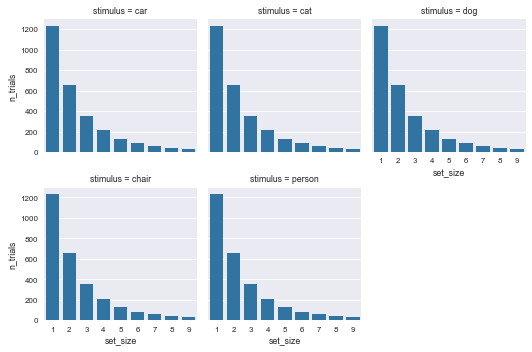

In [8]:
g = sns.FacetGrid(df_alex1, col="stimulus", height=2.5, col_wrap=3)
g.map(sns.barplot, "set_size", "n_trials")

## plot figure

In [9]:
NET_NAMES = [v for v in NET_NAMES_FOR_DISPLAY.values()]

CLASS_LABELS = [
    # in order from most to least frequent
    'person', 'chair', 'dog', 'car', 'cat'
]

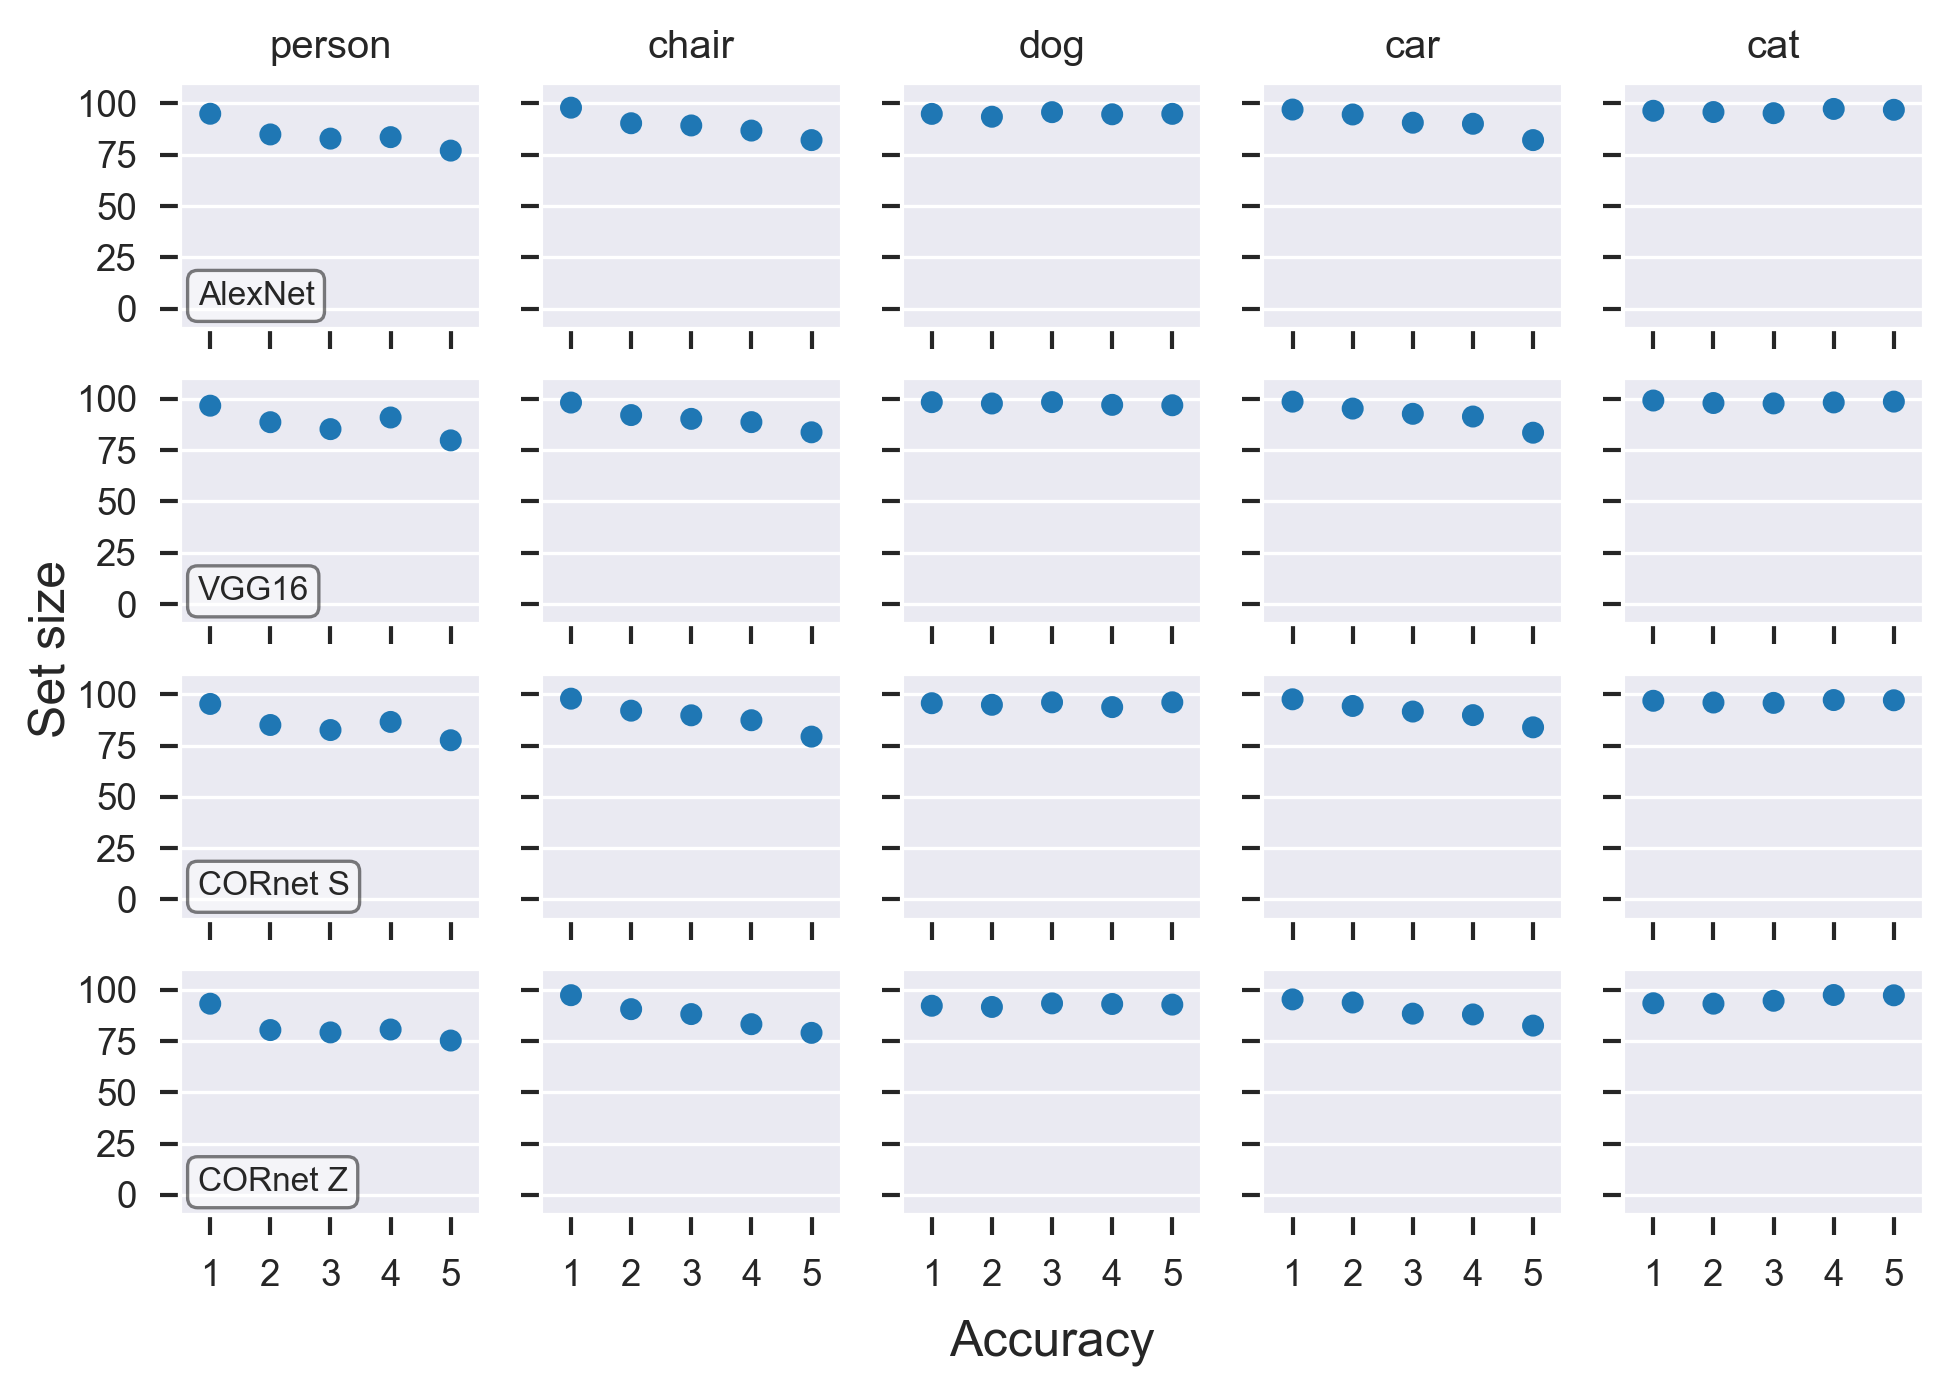

In [10]:
# ---- set-up
sns.set_context("paper")

N_ROWS = len(NET_NAMES)
N_COLS = len(CLASS_LABELS)

fig, ax_arr = plt.subplots(N_ROWS, N_COLS, figsize=(7.5, 5), dpi=300)

# add axes that we use only to plot net names in text box
row_axes = []
for row in range(N_ROWS):
    row_ax = fig.add_subplot(N_ROWS, 1, row + 1)
    row_ax.set_xticks([])
    row_ax.set_yticks([])
    row_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    row_ax.grid(False)
    row_ax.patch.set_facecolor('none')
    row_axes.append(row_ax)

MAX_SET_SIZE = 6  # will show up to 5
TEXTBOX_PROPS = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
# ---- actually plot figure
    

for row, net_name in enumerate(NET_NAMES):
    for col, class_label in enumerate(CLASS_LABELS):
        data = df_all[
            (df_all.net_name == net_name) &
            (df_all.stimulus == class_label)
        ]
        ax = ax_arr[row, col]
        sns.pointplot(
            data=data,
            x="set_size",
            y="accuracy",
            order=list(range(1, MAX_SET_SIZE)),
            join=False,
            scale=0.75,
            ci='sd',
            ax=ax
        )
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_ylim([-10, 110])
        if row == 0:
            ax.set_title(class_label)
        if col > 0:
            ax.set_yticklabels([])
        if row < N_ROWS - 1:
            ax.set_xticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        if col == 0:
            row_axes[row].text(0.01, 0.1, net_name, fontsize=8, bbox=TEXTBOX_PROPS)


# add a big axis, hide frame
big_ax = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
big_ax.set_xticks([])
big_ax.set_yticks([])
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.grid(False)

big_ax.set_xlabel("Accuracy", labelpad=25, fontsize=12);
big_ax.set_ylabel("Set size", labelpad=25, fontsize=12);

for ext in ('svg', 'png'):
    fig_path = pyprojroot.here().joinpath(
        f'docs/paper/figures/experiment-2/acc-v-set-size.{ext}'
    )
    fig.savefig(fig_path, bbox_inches='tight')